In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys 
sys.path.append('../../..')
import os 
from os.path import join as pjoin

os.environ['EMBEDDING_EVALUATION_DATA_PATH'] = '/home/hhansen/decon/decon_env/DecontextEmbeddings/helpers/embedding_evaluation/data/'
DATA_DIR = '/home/hhansen/DecontextEmbeddings/data'
os.environ['DATA_DIR'] = DATA_DIR

FIGURE_OUTPUT_DIR = pjoin(DATA_DIR, 'figures', 'things_rsa')


from helpers.embedding_evaluation.evaluate import Evaluation as wordsim_evaluate
from helpers.things_evaluation.evaluate import read_embeddings, load_behav, load_sorting, match_behv_sim, evaluate as run_evaluation
from helpers.data import yield_static_data
from helpers.intersection import get_intersection_words
from helpers.plot import get_ax, set_style_and_font_size, model_prettify

set_style_and_font_size()

from scipy.stats import spearmanr, pearsonr


In [4]:

from collections import defaultdict
import os 

matching = 'word'
corpus_folder = 'wikidumps'

combs = {
            'bert-base': range(13),
        'bert-large': range(25),
        'gpt-2': range(13),
        'gpt-2-medium': range(25),
        'sbert_bert': range(13),
        'sbert_distill_roberta': range(7)
}

results = defaultdict(lambda: defaultdict(defaultdict))

matching_words_things = get_intersection_words(1, matching=matching, corpus_folder=corpus_folder, )
print(f'use {len(matching_words_things)} for things')
    
for model, layers in combs.items():
    for layer in layers:
        for context in ['1', 'all']:
                # TODO homonyms and not vocab words
                #matching_words_things = remove_not_in_vocab(matching_words_things, True)
                

                # TODO when using mathcing words from wikidump -> layer 12 performs way better on wikitext-103
                # mayeb there are some words, where more context lead to better layer 12 results

            path = f'../../../../data/thinga/{corpus_folder}/decontext/{model}/{layer}/{matching}/mean/{context}/decontext.txt'
            pearson, spearman, matrix, sim_vector = run_evaluation(path, matching=matching, matching_words=matching_words_things)
            results[model][context][layer] = sim_vector


('w2v', '/home/hhansen/decon/decon_env/data/thinga/static/w2v/word2vec-google-news-300/embeddings.txt', 'word')
('glove', '/home/hhansen/decon/decon_env/data/thinga/static/glove/glove-wiki-gigaword-300/embeddings.txt', 'word')
('deconf', '/home/hhansen/decon/decon_env/data/thinga/static/deconf/embeddings.txt', 'synset')
Number of words intersection: 1522
use 1522 for things
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accor

Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe'

Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe'

Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe'

Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe'

Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe'

Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe'

# Correlation Heatmap

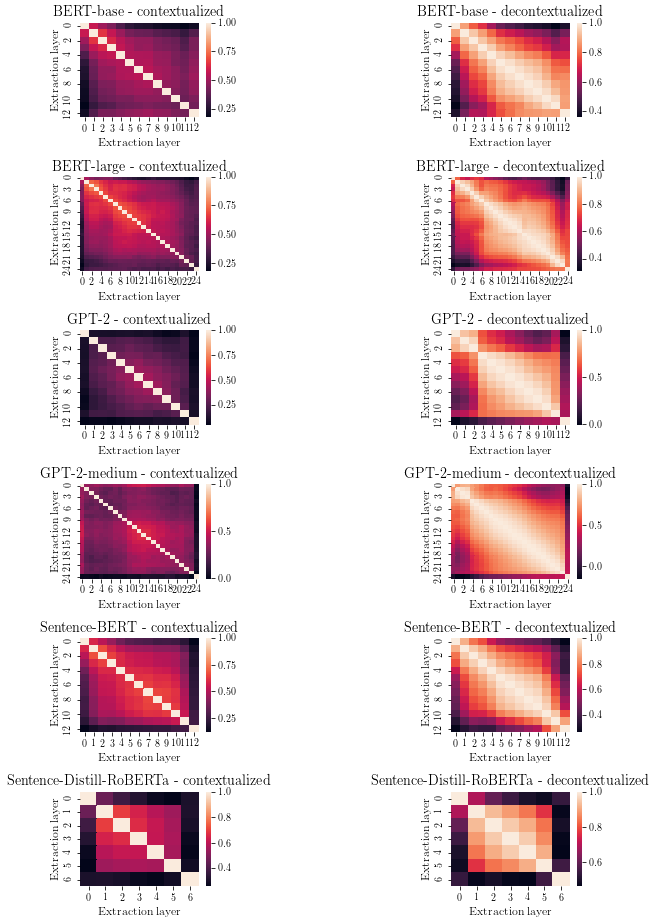

In [6]:
fig, axes = plt.subplots(6, 2, figsize=(8,13))

for i, model in enumerate(results):
    for m, context in enumerate(['1', 'all']):
        ax = axes[i][m]
        corrr = pd.DataFrame(results[model][context]).corr(method='spearman')
        sns.heatmap(corrr, ax=ax)
        context = 'contextualized' if context == '1' else 'decontextualized'
        ax.set_title(f'{model_prettify(model)} - {context}')
        ax.set_ylabel('Extraction layer')
        ax.set_xlabel('Extraction layer')
        
fig.tight_layout()
fig.subplots_adjust(wspace=1.5)
plt.savefig(f'things_layer_correlation_things.pdf', bbox_inches='tight')



# Clustering

In [ ]:
model = 'bert-base'
context = 'all'

similarity_vectors_per_layer = pd.DataFrame(results[model][context])
sns.clustermap(similarity_vectors_per_layer, row_cluster=False, metric='correlation')

In [ ]:
from sklearn.cluster import KMeans

similarity_vectors_per_layer = similarity_vectors_per_layer.T
kmeans = KMeans(n_clusters=3, random_state=0).fit(similarity_vectors_per_layer)

In [ ]:
kmeans.labels_

In [ ]:
model = 'gpt-2'
context = 'all'

similarity_vectors_per_layer = pd.DataFrame(results[model][context])
sns.clustermap(similarity_vectors_per_layer, row_cluster=False, metric='correlation')